In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('F:\machine_learning\Language Detection.csv')
df.head

<bound method NDFrame.head of                                                     Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]>

In [3]:
df['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Language', ylabel='count'>

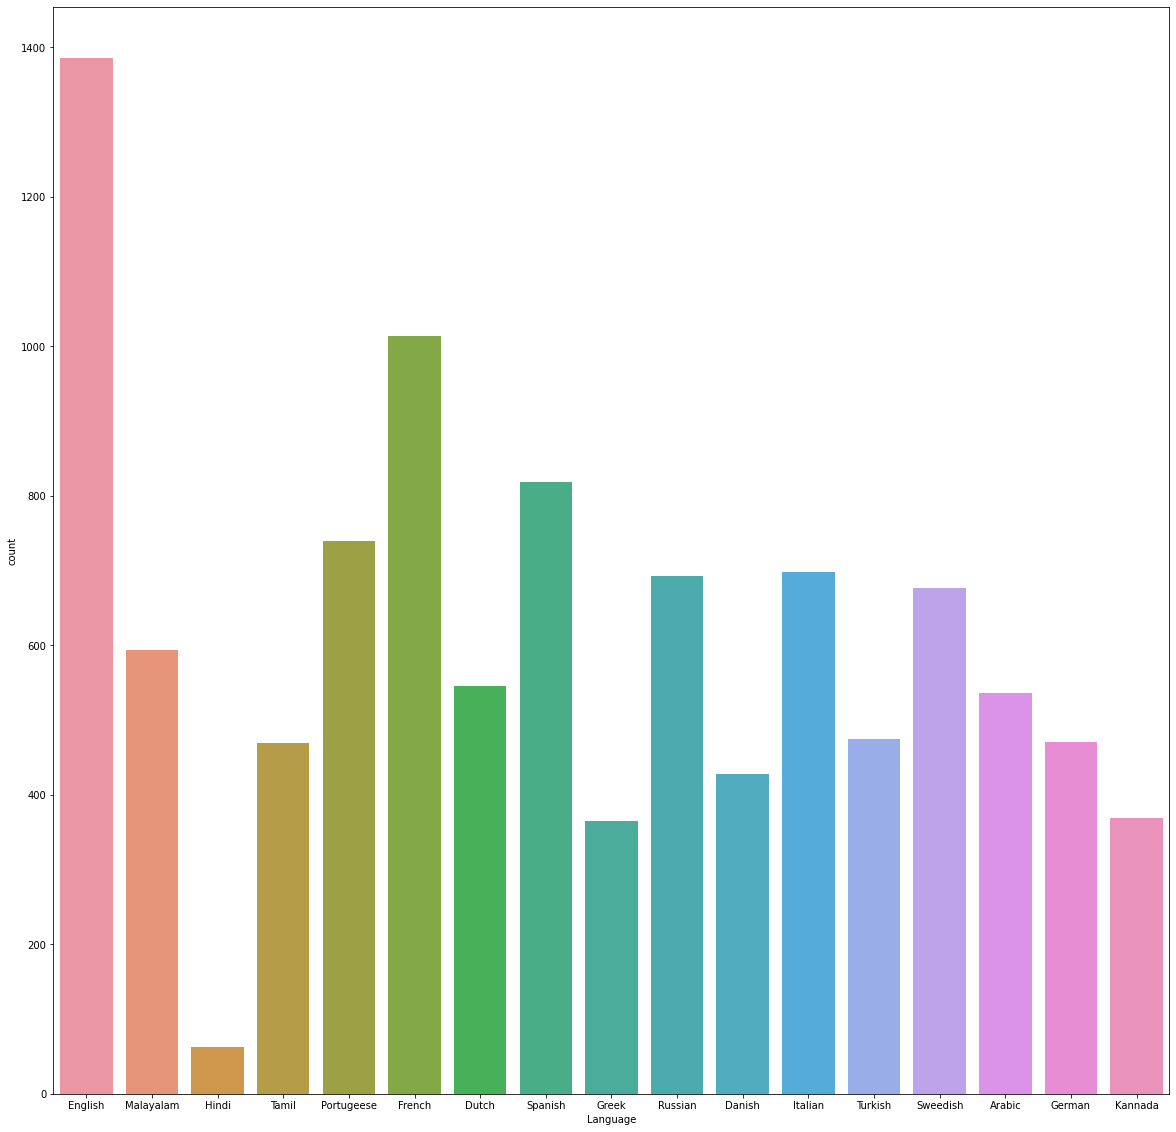

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(df['Language'])

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [6]:
ps = PorterStemmer()
corpus=[]

for i in range(len(df['Text'])):
    
    rev = re.sub("^[a-zA-Z]",' ', df['Text'][i]) 
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if set(stopwords.words())]
    rev = ' '.join(rev)
    corpus.append(rev)
    
    #print(f"{i}")

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(corpus).toarray()

In [8]:
X.shape

(10337, 10000)

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(df['Language'])

In [10]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [11]:
label.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [12]:
data1 = pd.DataFrame(np.c_[corpus,y],columns=['Sentence','Language'])

In [13]:
data1

,Sentence,Language
0,"nature, in the broadest sense, is the natural,...",3
1,"""nature"" can refer to the phenomena of the phy...",3
2,"he studi of natur is a large, if not the only,...",3
3,"lthough human are part of nature, human activ ...",3
4,[1] the word natur is borrow from the old fren...,3
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,9
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,9
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,9
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,9


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train,y_train)
pred = classifier.predict(X_test)

In [16]:
from sklearn.naive_bayes import BernoulliNB
model1 = BernoulliNB().fit(X_train,y_train)
pred1 = model1.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred1))

0.8655705996131529


In [18]:
pred

array([13, 16, 12, ...,  3, 13,  5])

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))
#print(confusion_matrix(y_test,pred))

0.9622823984526112


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier().fit(X_train,y_train)
pred3 = dtr.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred3))

0.8558994197292069


<AxesSubplot:>

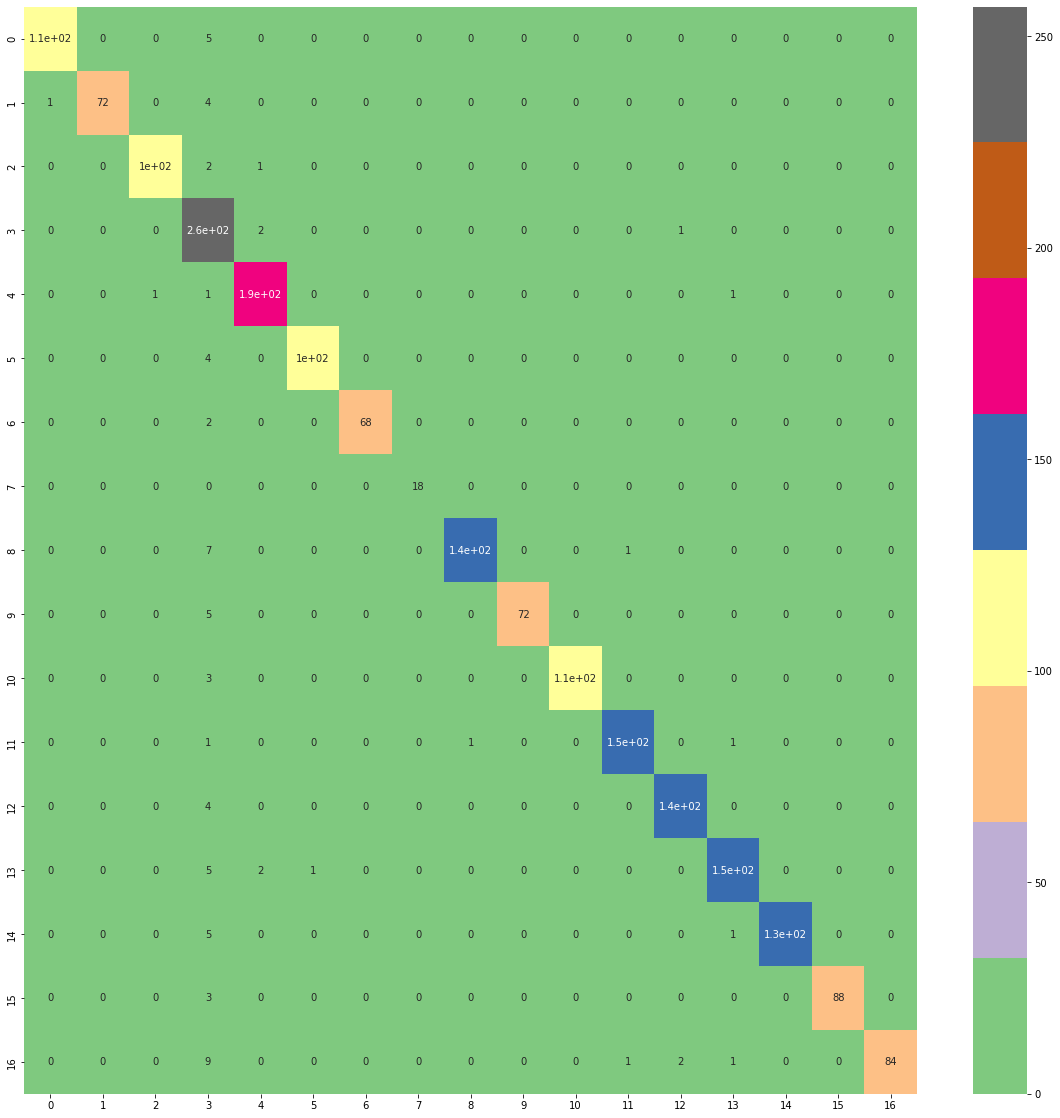

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

In [23]:
fnl = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
fnl

,Actual,Predicted
0,13,13
1,16,16
2,12,12
3,3,3
4,3,3
...,...,...
2063,12,12
2064,15,15
2065,3,3
2066,13,13


In [24]:
def test_model(test_sentence):
    languages = {'Arabic' : 0, 
                'Danish' : 1, 
                'Dutch' : 2, 
                'English' : 3, 
                'French' : 4, 
                'German' : 5,
                'Greek' : 6, 
                'Hindi' : 7, 
                'Italian' : 8, 
                'Kannada' : 9, 
                'Malayalam' : 10, 
                'Portugeese'  : 11,
                'Russian' : 12, 
                'Spanish' : 13, 
                'Sweedish' : 15, 
                'Tamil' : 16, 
                'Turkish' : 17}
    
    
    
    
    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if word not in set(stopwords.words())]
    rev = ' '.join(rev)
    
    rev = cv.transform([rev]).toarray()
    
    output = classifier.predict(rev)[0]
    
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    
    output = keys[position]
    
    print(output)